In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras

In [9]:
path =r"C:\Users\SOFT ZONE\Downloads\plantvillage dataset\color"

train_ds = keras.utils.image_dataset_from_directory(
    path,
    image_size=(224, 224),
    batch_size=32,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [10]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

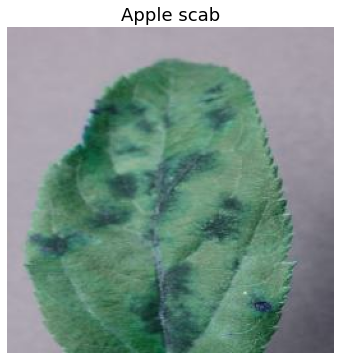

In [12]:
image = cv2.imread(r"C:\Users\SOFT ZONE\Downloads\plantvillage dataset\color\Apple___Apple_scab\7ead14ac-9bdd-42a9-bde9-b70d8b6694b7___FREC_Scab 3356.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

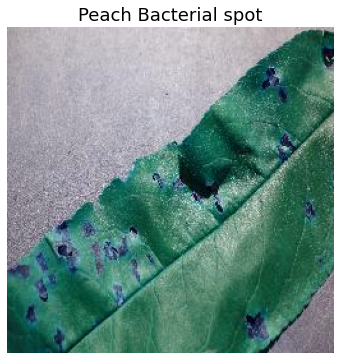

In [14]:
image = cv2.imread(r"C:\Users\SOFT ZONE\Downloads\plantvillage dataset\color\Peach___Bacterial_spot\0dd88d6a-2eb1-4a75-88bd-51ee5ad9d2f8___Rut._Bact.S 3438.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

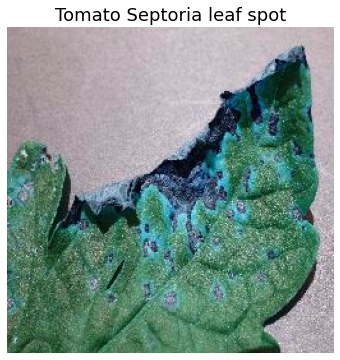

In [15]:
image = cv2.imread(r"C:\Users\SOFT ZONE\Downloads\plantvillage dataset\color\Tomato___Septoria_leaf_spot\0bcb24a9-bf45-4008-b9df-1c729f977b17___Matt.S_CG 7835.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)),  
    
    keras.layers.Rescaling(scale=1/255),  
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),

    # fully connected layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(38, activation='sigmoid')
])


In [19]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 587,558 (2.24 MB)

 Trainable params: 587,558 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1431s 1s/step - accuracy: 0.3399 - loss: 2.4384
Epoch 2/20
 970/1358 ━━━━━━━━━━━━━━━━━━━━ 6:00 929ms/step - accuracy: 0.7561 - loss: 0.7932

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_ds)

In [ ]:
def img_to_pred(image):
    image = image.numpy()
    image = tf.expand_dims(image,0)
    return image

In [ ]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(images[i].numpy().astype('uint32'))
        plt.axis('off')
        actual = classes[labels[i]]
        predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
        plt.title(f"actual : {actual}  \n predicted : {predict} ")

In [ ]:
from tensorflow.keras.models import load_model
model.save('Disease Detection')